**Visualising amplitude amplification**

Let a search space with N items, indexed from 0 to N-1, be represented by the quantum states |0>,...,|N−1>.

Consider one of these items is the solution of your search problem and use Grover’s algorithm to find it.

Write a computer programme that represents visually, e.g. as bars, the real-valued amplitudes of these states as the algorithm evolves, for each Grover iteration.

In [1]:
import numpy as np
import gmpy
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

n = 3
N = 2**n
goal = 6
T = 20 #Number of iterations

In [2]:
qubits = np.zeros(N)
qubits[0] = 1 #Only the state |0> exists
print(qubits)

[ 1.  0.  0.  0.  0.  0.  0.  0.]


In [3]:
def Hadamard(qb):
    """a = np.arange(N)
    b = qb[np.newaxis,:]
    print(a.shape, b.shape)
    s = np.bitwise_and(a, qb[k])
    print(s)
    coefs = np.where(gmpy.popcount(s) & 1, -1, 1)
    final_qb = np.sum(coefs, axis=1)"""
    final_qb = np.array([np.sum([qb[k] * (1-2*(gmpy.popcount(l & k) & 1))/np.sqrt(N)
                                 for k in range(N)]) for l in range(N)])
    return final_qb

def Oracle(qb):
    qb[goal] *= -1
    return qb

def Phase_Shift(qb):
    qb *= -1
    qb[0] *= -1
    return qb

def Grover(qb):
    return Hadamard(Phase_Shift(Hadamard(Oracle(qb))))

In [4]:
print(qubits)

[ 1.  0.  0.  0.  0.  0.  0.  0.]


In [5]:
qb_state = np.zeros((N,T+1))
qb_state[:,0] = Hadamard(qubits)

for t in range(T):
    qb_state[:,t+1] = Grover(qb_state[:,t])

In [6]:
#print(qb_state)
amp_state = np.abs(np.square(qb_state))
#print(amp_state)
print(np.sum(amp_state,axis=1))

[  1.45286854   1.45286854   1.45286854   1.45286854   1.45286854
   1.45286854  10.82992025   1.45286854]


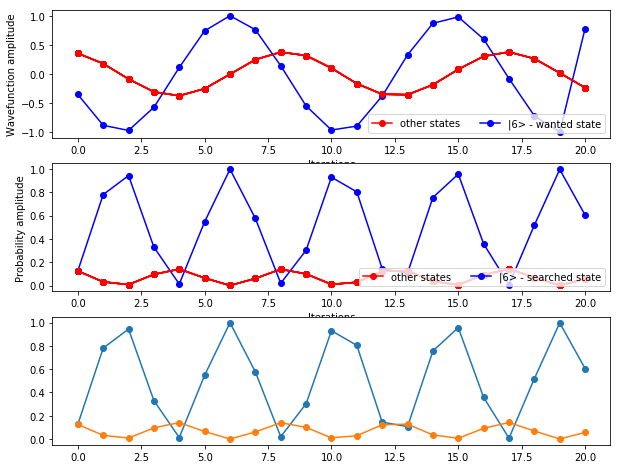

In [8]:
plt.subplot(3,1,1)
plt.xlabel('Iterations')
plt.ylabel('Wavefunction amplitude')
k=0
for i in range(N):
    if i == goal:
        plt.plot(qb_state[i,:], 'o-', label=str('|'+str(i)+'> - wanted state'), color='b')
    elif k == 0:
        plt.plot(qb_state[i,:], 'o-', label=str('other states'), color='r')
        k=1
    else:
        plt.plot(qb_state[i,:], 'o-', color='r')
plt.legend(loc='lower right', ncol=4)

plt.subplot(3,1,2)
plt.xlabel('Iterations')
plt.ylabel('Probability amplitude')
k=0
for i in range(N):
    if i == goal:
        plt.plot(amp_state[i,:], 'o-', label=str('|'+str(i)+'> - searched state'), color='b')
    elif k == 0:
        plt.plot(amp_state[i,:], 'o-', label=str('other states'), color='r')
        k=1
    else:
        plt.plot(amp_state[i,:], 'o-', color='r')
plt.legend(loc='lower right', ncol=4)

plt.subplot(3,1,3)
theta=2*np.arcsin(1/np.sqrt(N))
x=np.arange(T+1)
plt.plot(x,np.sin(x*theta+theta/2)**2,'o-')
plt.plot(x,np.cos(x*theta+theta/2)**2 /(N-1),'o-')

#plt.gcf().set_size_inches(15, 15)
plt.show()